<a href="https://colab.research.google.com/github/noahgift/regression-concepts/blob/master/height_weight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Height & Weight 25k Records

* Original dataset from:  http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights
* 25,000 synthetic records of human heights and weights of 18 years old children

## Ingest

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/noahgift/regression-concepts/master/height-weight-25k.csv")
df.head()

,Index,Height-Inches,Weight-Pounds
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


## EDA

### Scatterplot

In [7]:
import seaborn as sns
import numpy as np

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


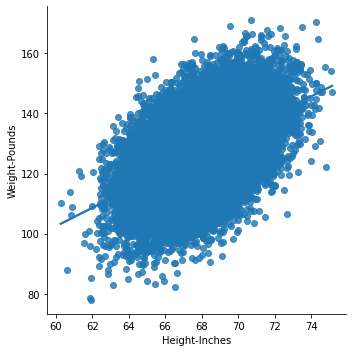

In [8]:
sns.lmplot("Height-Inches", "Weight-Pounds", data=df)

### Descriptive Statistics

In [9]:
df.describe()

,Index,Height-Inches,Weight-Pounds
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


### Kernel Density Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


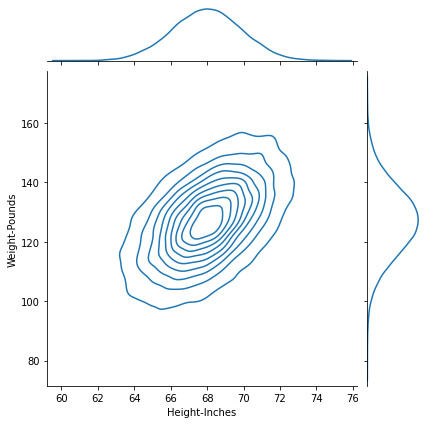

In [10]:
sns.jointplot("Height-Inches", "Weight-Pounds", data=df, kind="kde");

## Modeling 

### Sklearn Regression Model

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

#### Extract and Inspect Feature and Target

In [12]:
y = df['Weight-Pounds'].values #Target
y = y.reshape(-1, 1)
X = df['Height-Inches'].values #Feature(s)
X = X.reshape(-1,1)

In [13]:
y.shape

(25000, 1)

#### Split the Data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(20000, 1) (20000, 1)
(5000, 1) (5000, 1)


#### Fit the model

In [32]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(X_train, y_train)
y_predicted = lm.predict(X_test)

AttributeError: ignored

#### Print accuracy of Linear Regression Model

In [16]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#RMSE Root Mean Squared Error
rms = sqrt(mean_squared_error(y_predicted, y_test))
rms

9.966074183159119

#### Plot Predicted Height versus Actual Height

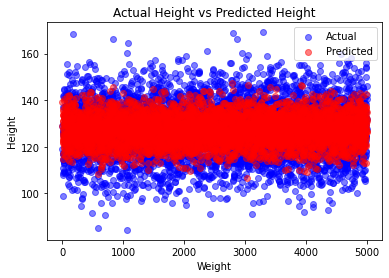

In [17]:
import matplotlib.pyplot as plt
_, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.5)
ax.scatter(x = range(0, y_predicted.size), y=y_predicted, c = 'red', label = 'Predicted', alpha = 0.5)

plt.title('Actual Height vs Predicted Height')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.legend()
plt.show()

### Regression with PyTorch

convert data to float

In [18]:
# Training Data
x_train = np.array(X_train, dtype=np.float32)
x_train = x_train.reshape(-1, 1)
y_train = np.array(y_train, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

# Test Data
x_test = np.array(X_test, dtype=np.float32)
x_test = x_test.reshape(-1, 1)
y_test = np.array(y_test, dtype=np.float32)
y_test = y_test.reshape(-1, 1)

In [19]:
import torch
from torch.autograd import Variable

class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

Create a model with CUDA enabled

In [20]:
inputDim = 1        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.0001 
epochs = 1000

model = linearRegression(inputDim, outputDim)
model.cuda()

linearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

Create Stochastic Gradient Descent and Loss Function

In [21]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

train the model

In [22]:
for epoch in range(epochs):
    inputs = Variable(torch.from_numpy(x_train).cuda())
    labels = Variable(torch.from_numpy(y_train).cuda())
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    print(loss)
    # get gradients w.r.t to parameters
    loss.backward()
    # update parameters
    optimizer.step()
    print('epoch {}, loss {}'.format(epoch, loss.item()))

tensor(20903.9648, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 0, loss 20903.96484375
tensor(224.0141, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 1, loss 224.01409912109375
tensor(108.2931, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 2, loss 108.29308319091797
tensor(107.6455, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 3, loss 107.64552307128906
tensor(107.6419, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 4, loss 107.64189910888672
tensor(107.6419, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 5, loss 107.6418685913086
tensor(107.6419, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 6, loss 107.64188385009766
tensor(107.6419, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 7, loss 107.6418685913086
tensor(107.6419, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 8, loss 107.64188385009766
tensor(107.6419, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 9, loss 107.64188385009766
tensor(107.6419, device='cuda:0', grad_fn=<MseLossBack

#### Plot Predicted Height vs Actual Height

[[134.5343 ]
 [128.31352]
 [125.81574]
 ...
 [126.89599]
 [129.54024]
 [126.70605]]


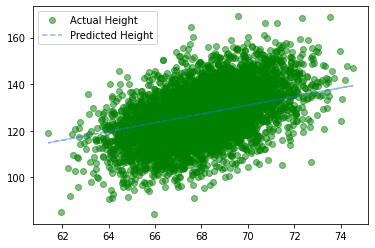

In [23]:
with torch.no_grad():
    predicted = model(Variable(torch.from_numpy(x_test).cuda())).cpu().data.numpy()
    print(predicted)

plt.clf()
plt.plot(x_test, y_test, 'go', label='Actual Height', alpha=0.5)
plt.plot(x_test, predicted, '--', label='Predicted Height', alpha=0.5)
plt.legend(loc='best')
plt.show()

#### Print RMSE

In [24]:
#RMSE Root Mean Squared Error
rms = sqrt(mean_squared_error(x_test, predicted))
rms

59.26140037341971

### Example Coefficients

In [35]:
import numpy as np
from sklearn.linear_model import LinearRegression
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3
reg = LinearRegression().fit(X, y)

In [37]:
reg.score(X, y)
reg.coef_
reg.intercept_
reg.predict(np.array([[3, 5]]))

array([16.])